In [2]:
%matplotlib inline

from preprocessFunctions import Preprocess



INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Incompatible GDAL 3.3.2 found on system. Internal GDAL 3.0.0 from distribution will be used.
INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Internal GDAL 3.0.0 set to be used by SNAP.
INFO: org.esa.snap.core.gpf.operators.tooladapter.ToolAdapterIO: Initializing external tool adapters
INFO: org.esa.snap.core.util.EngineVersionCheckActivator: Please check regularly for new updates for the best SNAP experience.


In [3]:
prosess = Preprocess()
    
product = prosess.read_product("unprocessed_downloads/S1B_IW_GRDH_1SDV_20200910T060300_20200910T060325_023309_02C443_0BCF.zip")

info = prosess.get_product_info(product)

print(info)
prosess.plotBand(product, "Intensity_VV", 0, 100000, "testimage2.png")


Band names: Amplitude_VH, Intensity_VH, Amplitude_VV, Intensity_VV
{'width': 26735, 'height': 16681, 'name': 'S1B_IW_GRDH_1SDV_20200910T060300_20200910T060325_023309_02C443_0BCF', 'band_names': 'Amplitude_VH, Intensity_VH, Amplitude_VV, Intensity_VV'}

plotting Intensity_VV...
26735 16681


INFO: org.esa.s2tbx.dataio.gdal.GDALVersion: Internal GDAL 3.0.0 set to be used by SNAP.
INFO: org.hsqldb.persist.Logger: dataFileCache open start
QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-renatask'
libGL error: No matching fbConfigs or visuals found
libGL error: failed to load driver: swrast


In [1]:

subset1 = prosess.add_shape_file(product,"shapefiles/molde/molde.shp")
prosess.plotBand(subset1, "Intensity_VV", 0, 100000, "subset2.png")

NameError: name 'prosess' is not defined


applying orbit


plotting Intensity_VV...
26735 16681
100% done.


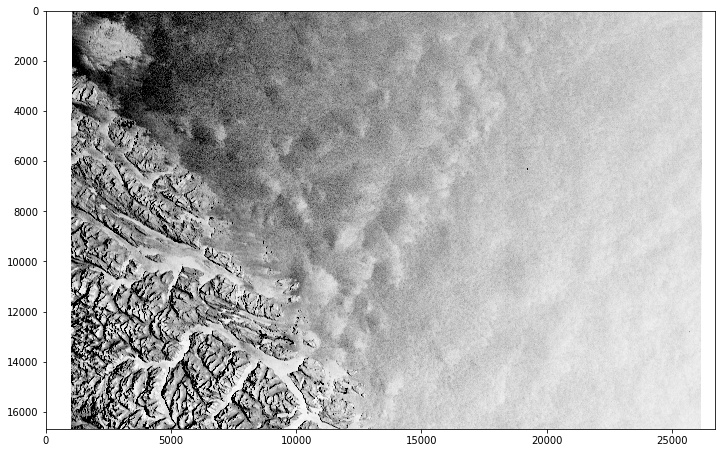

In [5]:
product_O = prosess.apply_orbit_file(product)
prosess.plotBand(product_O, "Intensity_VV", 0, 100000, "testimage_orbit2.png")

In [ ]:
subset_O = prosess.apply_orbit_file(subset1)
prosess.plotBand(subset_O, "Intensity_VV", 0, 100000)


thermal noise removal...

plotting Intensity_VV...
26735 16681

100% done.


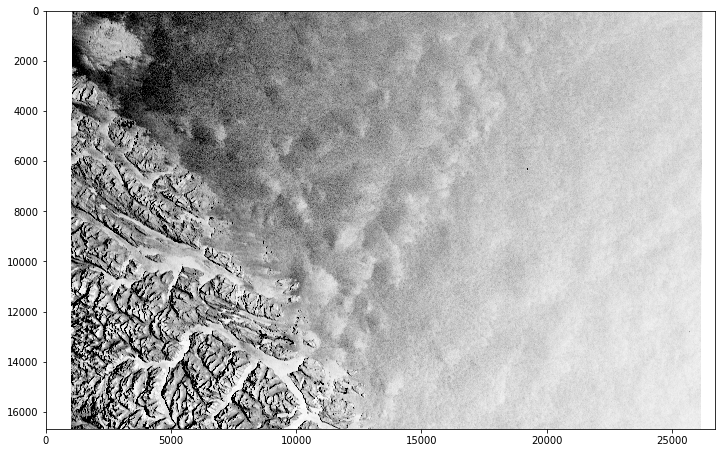

In [6]:

product_TNR = prosess.apply_thermal_noise_removal(product_O)
prosess.plotBand(product_TNR, "Intensity_VV", 0, 100000, "testimage_thermalnoise2.png")


In [ ]:

subset_TNR = prosess.apply_thermal_noise_removal(subset_O)
prosess.plotBand(subset_TNR, "Intensity_VV", 0, 100000)


calibrating...


plotting Beta0_VV...
26735 16681
100% done.


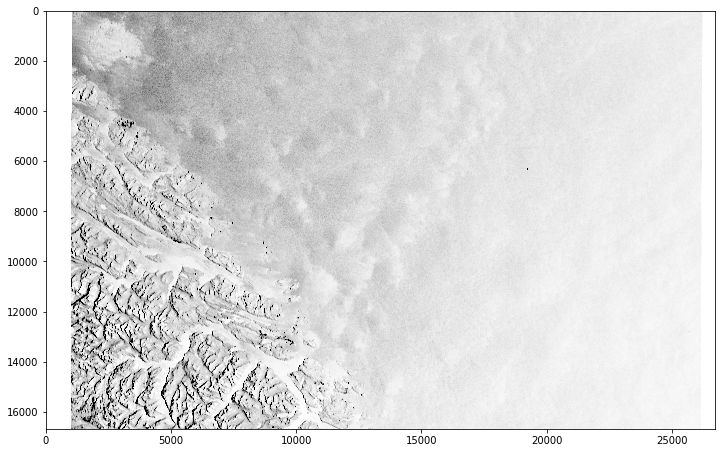

In [7]:

product_C = prosess.calibrate(product_TNR)
prosess.plotBand(product_C, "Beta0_VV", 0, 1, "testimage_calibrate2.png")


In [ ]:

subset_C = prosess.calibrate(subset_TNR)
prosess.plotBand(subset_C, "Beta0_VV", 0, 1)


applying speckle filter...

plotting Beta0_VV...

26735 16681100% done.

Band names: Beta0_VH, Beta0_VV
{'width': 26735, 'height': 16681, 'name': 'S1B_IW_GRDH_1SDV_20200910T060300_20200910T060325_023309_02C443_0BCF_Orb_NR_Cal_Spk', 'band_names': 'Beta0_VH, Beta0_VV'}


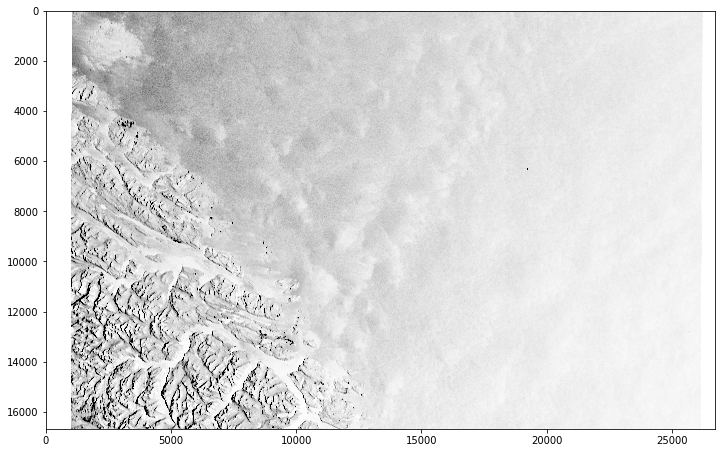

In [8]:

product_SF = prosess.speckle_filter(product_C)
prosess.plotBand(product_SF, "Beta0_VV", 0, 1, "testimage_speckle2.png")

info = prosess.get_product_info(product_SF)

print(info)


In [ ]:
subset_SF = prosess.speckle_filter(subset_C)
prosess.plotBand(subset_SF, "Beta0_VV", 0, 1, "testimage_speckle2.png")

info = prosess.get_product_info(subset_SF)

print(info)


In [ ]:

#product_TF = prosess.terrain_flattening(product_C)
#prosess.plotBand(product_TF, "Gamma0_VV", 0, 0.1, "testimage_terrainflattened2.png")



applying terrain correction...

plotting Beta0_VH...

64863 21603
100% done.
Band names: Beta0_VH, Beta0_VV
{'width': 64863, 'height': 21603, 'name': 'S1B_IW_GRDH_1SDV_20200910T060300_20200910T060325_023309_02C443_0BCF_Orb_NR_Cal_Spk_TC', 'band_names': 'Beta0_VH, Beta0_VV'}


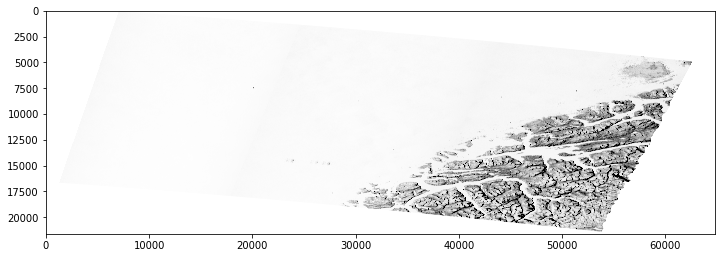

In [9]:

product_TC = prosess.terrain_correction(product_SF)
prosess.plotBand(product_TC, "Beta0_VH", 0, 0.1, "testimage_terraincorrected2.png")

info = prosess.get_product_info(product_TC)

print(info)


In [ ]:
subset_TC = prosess.terrain_correction(subset_SF)
prosess.plotBand(subset_TC, "Beta0_VH", 0, 0.1)

info = prosess.get_product_info(subset_TC)

print(info)


applying shapefile


plotting Beta0_VH...
2128 858
100% done.

applying shapefile

plotting Beta0_VH...

4191 2158
100% done.


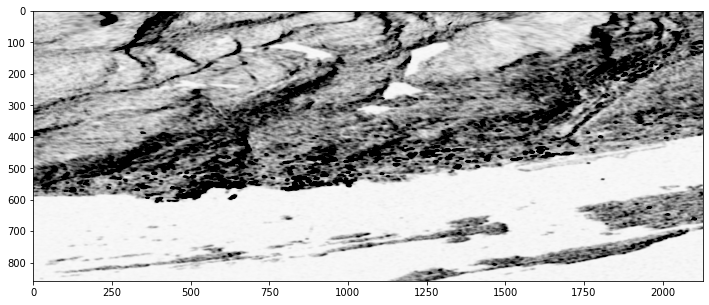

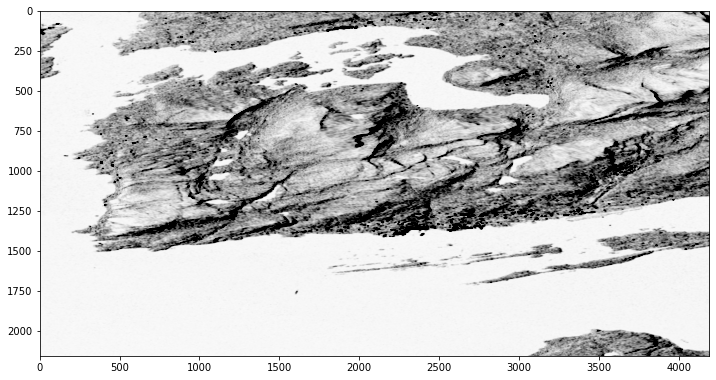

In [10]:

subset2 = prosess.add_shape_file(product_TC,"shapefiles/molde2/mol2.shp")
prosess.plotBand(subset2, "Beta0_VH", 0, 0.1, "subset222.png")

subset3 = prosess.add_shape_file(product_TC,"shapefiles/molde/molde.shp")
prosess.plotBand(subset3, "Beta0_VH", 0, 0.1, "subset22.png")

In [ ]:
from snappy import ProductIO

ProductIO.writeProduct(product_TC, "TC", "BEAM-DIMAP")
ProductIO.writeProduct(subset2, "TC_sub2",  'GeoTIFF')
ProductIO.writeProduct(subset3, "TC_sub3",  'GeoTIFF')